In [20]:
import pickle
import numpy as np

# Define the file path
file_path = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240613/20240613_204151_Run1_VIGO17_NS089008_QPD_20_20_AS_011_CC_AmplitudeUniformity.pkl"

# Open and load the .pkl file
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Print the type of data and check keys if it's a dictionary
print(f"Data type: {type(data)}")
if isinstance(data, dict):
    print(f"Keys: {list(data.keys())}")

# Check the structure of 'rawdata'
rawdata = data.get('rawdata', None)
if rawdata is None:
    raise ValueError("No 'rawdata' found in the file!")

# Print rawdata type and keys (for debugging)
print(f"Rawdata type: {type(rawdata)}")
if isinstance(rawdata, dict):
    print(f"Rawdata keys: {list(rawdata.keys())}")


Data type: <class 'dict'>
Keys: ['dut', 'global_params', 'dmm00', 'smu00', 'awg00', 'spa00', 'rfsw00', 'nsc00', 'lta00', 'trac00', 'rawdata']
Rawdata type: <class 'dict'>
Rawdata keys: ['comp_gps_time', 'smu00_curr_amp', 'smu00_bias_volt', 'th2e01_temp_degreec', 'th2e01_humd_percent', 'th2e01_dewp_degreec', 'stage_laser_xposition', 'stage_laser_yposition', 'quadA', 'quadB', 'quadC', 'quadD', 'start_date', 'start_time', 'end_date', 'end_time', 'meas_total_duration']


In [21]:
# Check the type and shape of x and y position arrays
x_positions = rawdata.get('stage_laser_xposition', None)
y_positions = rawdata.get('stage_laser_yposition', None)

print(f"x_positions type: {type(x_positions)}, shape: {getattr(x_positions, 'shape', 'N/A')}")
print(f"y_positions type: {type(y_positions)}, shape: {getattr(y_positions, 'shape', 'N/A')}")

# Show a preview if they are arrays or lists
if isinstance(x_positions, (list, np.ndarray)) and isinstance(y_positions, (list, np.ndarray)):
    print(f"x_positions sample: {x_positions[:10]}")
    print(f"y_positions sample: {y_positions[:10]}")
else:
    print("x_positions or y_positions are not in expected list/array format!")

#print(f"x_positions sample: {x_positions}")

x_positions type: <class 'numpy.ndarray'>, shape: (69, 69)
y_positions type: <class 'numpy.ndarray'>, shape: (69, 69)
x_positions sample: [[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125.
  125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125.
  125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125.
  125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125.
  125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 125.]
 [150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.
  150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150. 150.
  150.

In [22]:
# Extract quadrants
quadA = rawdata.get('quadA', {})
quadB = rawdata.get('quadB', {})
quadC = rawdata.get('quadC', {})
quadD = rawdata.get('quadD', {})

# Print keys in each quadrant
print(f"quadA keys: {list(quadA.keys())}")
print(f"quadB keys: {list(quadB.keys())}")
print(f"quadC keys: {list(quadC.keys())}")
print(f"quadD keys: {list(quadD.keys())}")


quadA keys: ['dmm00_curr_amp', 'spa_trace_dbm', 'spa_peak1_dbm']
quadB keys: ['dmm00_curr_amp', 'spa_trace_dbm', 'spa_peak1_dbm']
quadC keys: ['dmm00_curr_amp', 'spa_trace_dbm', 'spa_peak1_dbm']
quadD keys: ['dmm00_curr_amp', 'spa_trace_dbm', 'spa_peak1_dbm']


In [23]:
# Extract DC current amplitude data from each quadrant
dccurr_A = np.array(rawdata['quadA'].get('dmm00_curr_amp', []))
dccurr_B = np.array(rawdata['quadB'].get('dmm00_curr_amp', []))
dccurr_C = np.array(rawdata['quadC'].get('dmm00_curr_amp', []))
dccurr_D = np.array(rawdata['quadD'].get('dmm00_curr_amp', []))

# Print shape to check if they are matrices or 1D arrays
print(f"quadA dmm00_curr_amp shape: {dccurr_A.shape}")
print(f"quadB dmm00_curr_amp shape: {dccurr_B.shape}")
print(f"quadC dmm00_curr_amp shape: {dccurr_C.shape}")
print(f"quadD dmm00_curr_amp shape: {dccurr_D.shape}")

# print(dccurr_A)

quadA dmm00_curr_amp shape: (69, 69, 10)
quadB dmm00_curr_amp shape: (69, 69, 10)
quadC dmm00_curr_amp shape: (69, 69, 10)
quadD dmm00_curr_amp shape: (69, 69, 10)


In [24]:
#print("dccurr_A:", dccurr_D)
# Print shape to check if they are matrices or 1D arrays
print(f"quadA dmm00_curr_amp shape: {dccurr_A.shape}")

quadA dmm00_curr_amp shape: (69, 69, 10)


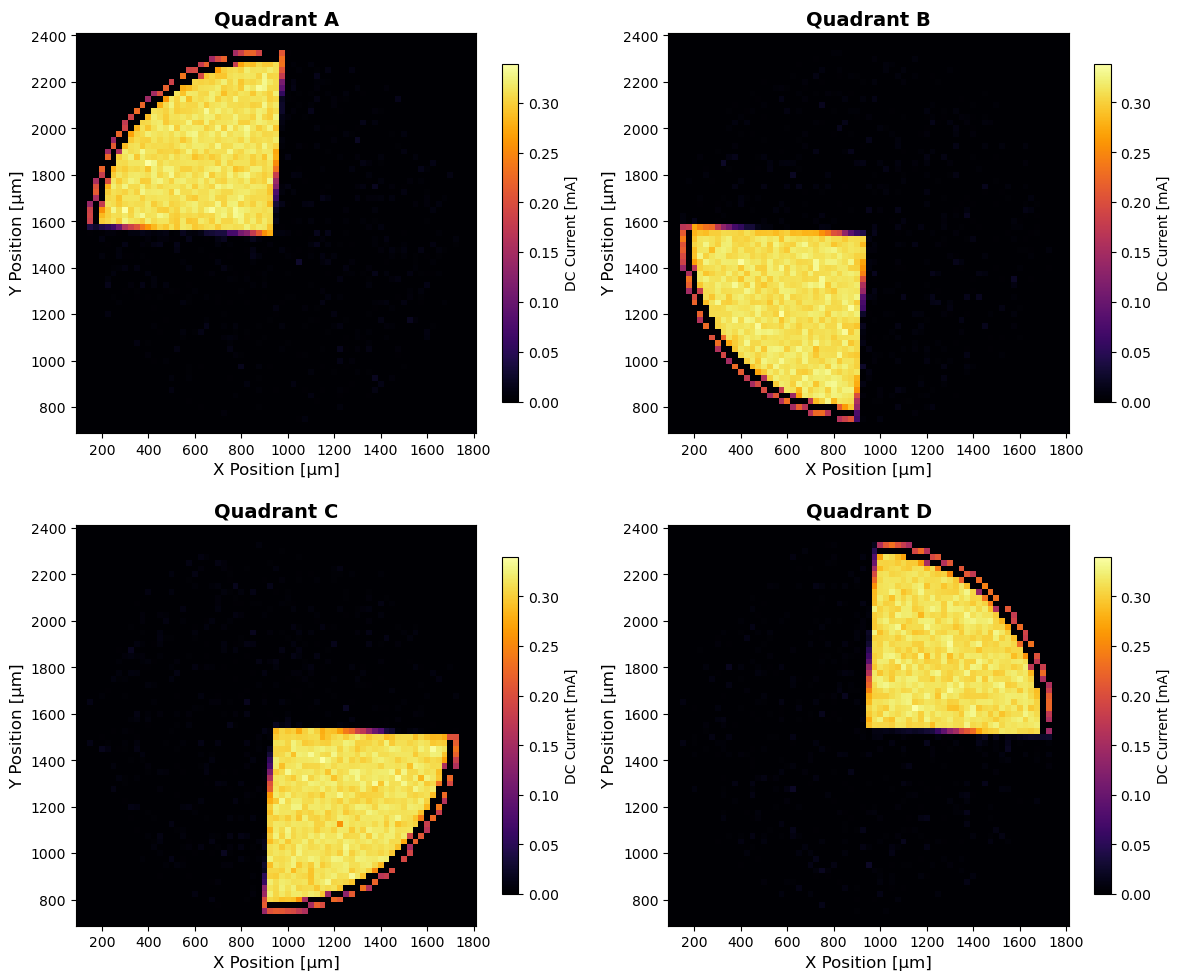

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Extract position data
x_positions = rawdata['stage_laser_xposition']
y_positions = rawdata['stage_laser_yposition']

# Extract current data from each quadrant
dccurr_A = np.array(rawdata['quadA']['dmm00_curr_amp'])
dccurr_B = np.array(rawdata['quadB']['dmm00_curr_amp'])
dccurr_C = np.array(rawdata['quadC']['dmm00_curr_amp'])
dccurr_D = np.array(rawdata['quadD']['dmm00_curr_amp'])

# Compute the mean across the third dimension (axis=2) and flatten the result
dccurr_A = dccurr_A.mean(axis=2).flatten()
dccurr_B = dccurr_B.mean(axis=2).flatten()
dccurr_C = dccurr_C.mean(axis=2).flatten()
dccurr_D = dccurr_D.mean(axis=2).flatten()

# Reshape the flattened arrays back into 2D for plotting
dccurr_A = dccurr_A.reshape(69, 69)
dccurr_B = dccurr_B.reshape(69, 69)
dccurr_C = dccurr_C.reshape(69, 69)
dccurr_D = dccurr_D.reshape(69, 69)

# Convert the current values to milliamps (mA)
dccurr_A *= 1000
dccurr_B *= 1000
dccurr_C *= 1000
dccurr_D *= 1000

def plot_quadrant(ax, x, y, data, title):
    c = ax.pcolormesh(x, y, data, shading='auto', cmap="inferno", vmin=0, vmax=np.max(data))
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("X Position [µm]", fontsize=12)
    ax.set_ylabel("Y Position [µm]", fontsize=12)
    
    ax.set_aspect('equal')  # Ensure square aspect ratio
    plt.colorbar(c, ax=ax, shrink=0.8, label="DC Current [mA]")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_quadrant(axes[0, 0], x_positions, y_positions, dccurr_A, "Quadrant A")
plot_quadrant(axes[0, 1], x_positions, y_positions, dccurr_B, "Quadrant B")
plot_quadrant(axes[1, 0], x_positions, y_positions, dccurr_C, "Quadrant C")
plot_quadrant(axes[1, 1], x_positions, y_positions, dccurr_D, "Quadrant D")

plt.tight_layout()
plt.show()

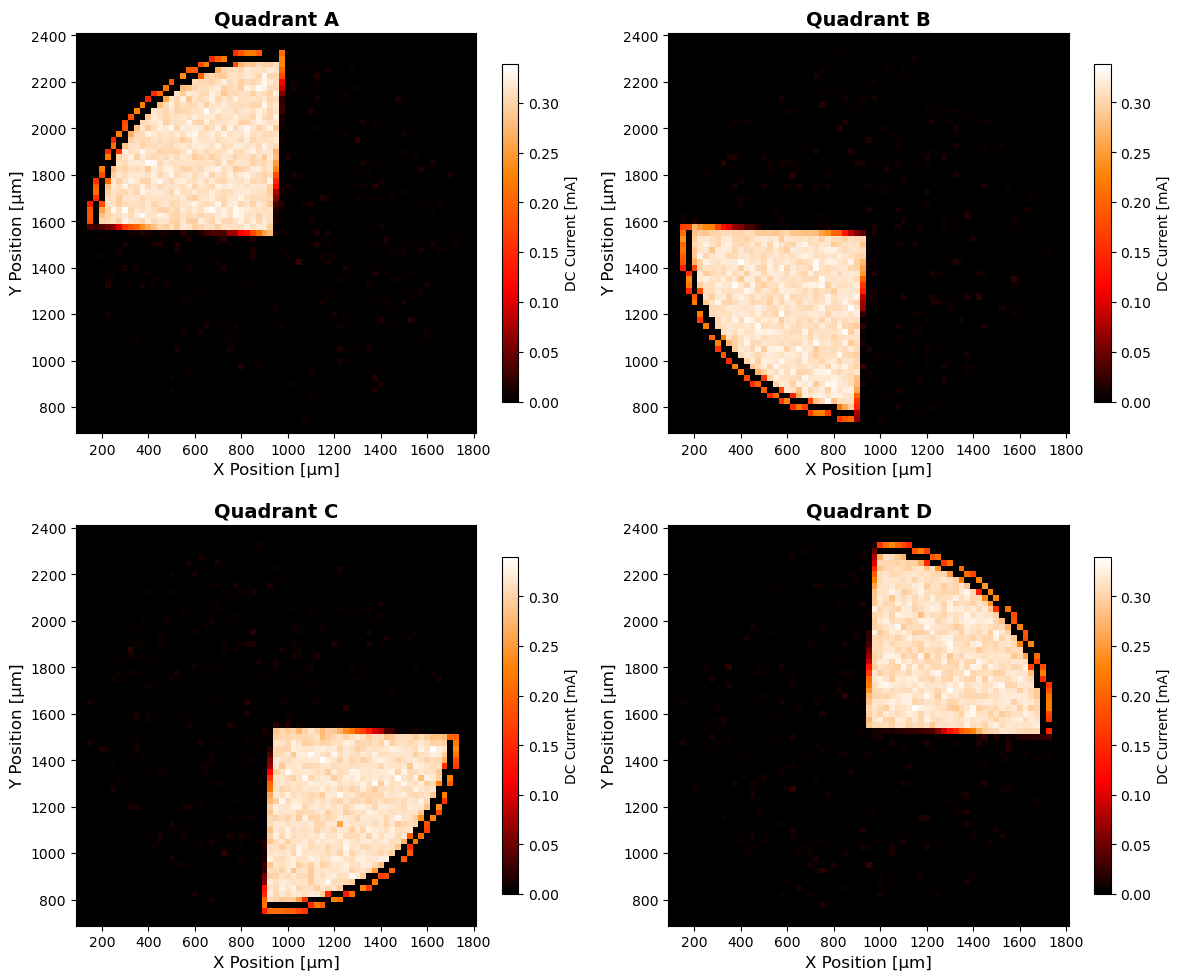

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Extract position data
x_positions = rawdata['stage_laser_xposition']
y_positions = rawdata['stage_laser_yposition']

# Extract current data from each quadrant
dccurr_A = np.array(rawdata['quadA']['dmm00_curr_amp'])
dccurr_B = np.array(rawdata['quadB']['dmm00_curr_amp'])
dccurr_C = np.array(rawdata['quadC']['dmm00_curr_amp'])
dccurr_D = np.array(rawdata['quadD']['dmm00_curr_amp'])

# Compute the mean across the third dimension (axis=2) and flatten the result
dccurr_A = dccurr_A.mean(axis=2).flatten()
dccurr_B = dccurr_B.mean(axis=2).flatten()
dccurr_C = dccurr_C.mean(axis=2).flatten()
dccurr_D = dccurr_D.mean(axis=2).flatten()

# You'd need to reshape the flattened arrays back into 2D for plotting, if needed
# If you still want a (69, 69) grid for visualization
dccurr_A = dccurr_A.reshape(69, 69)
dccurr_B = dccurr_B.reshape(69, 69)
dccurr_C = dccurr_C.reshape(69, 69)
dccurr_D = dccurr_D.reshape(69, 69)

# Convert the current values to milliamps (mA)
dccurr_A *= 1000
dccurr_B *= 1000
dccurr_C *= 1000
dccurr_D *= 1000

# Define the custom colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 1)]  # Black -> Red -> Orange -> White
n_bins = 100  # Number of bins for the colormap
cm = mcolors.LinearSegmentedColormap.from_list("black_red_white", colors, N=n_bins)

def plot_quadrant(ax, x, y, data, title, cm):
    c = ax.pcolormesh(x, y, data, shading='auto', cmap=cm, vmin=0, vmax=np.max(data))
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("X Position [µm]", fontsize=12)
    ax.set_ylabel("Y Position [µm]", fontsize=12)
    
    ax.set_aspect('equal')  # Ensure square aspect ratio
    plt.colorbar(c, ax=ax, shrink=0.8, label="DC Current [mA]")

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_quadrant(axes[0, 0], x_positions, y_positions, dccurr_A, "Quadrant A", cm)
plot_quadrant(axes[0, 1], x_positions, y_positions, dccurr_B, "Quadrant B", cm)
plot_quadrant(axes[1, 0], x_positions, y_positions, dccurr_C, "Quadrant C", cm)
plot_quadrant(axes[1, 1], x_positions, y_positions, dccurr_D, "Quadrant D", cm)


plt.tight_layout()
plt.show()


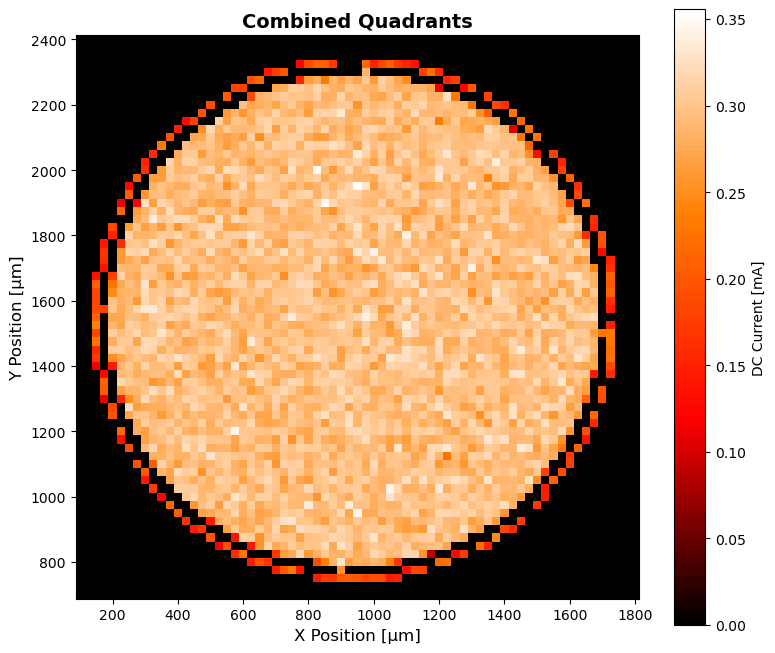

In [27]:
# Sum the current values from all quadrants
combined_current = dccurr_A + dccurr_B + dccurr_C + dccurr_D

# Define the custom colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 1)]  # Black -> Red -> Orange -> White
n_bins = 100  # Number of bins for the colormap
cm = mcolors.LinearSegmentedColormap.from_list("black_red_white", colors, N=n_bins)

# Create a single plot for the combined data
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the combined data
c = ax.pcolormesh(x_positions, y_positions, combined_current, shading='auto', cmap=cm, vmin=0, vmax=np.max(combined_current))

ax.set_title("Combined Quadrants", fontsize=14, fontweight='bold')
ax.set_xlabel("X Position [µm]", fontsize=12)
ax.set_ylabel("Y Position [µm]", fontsize=12)

ax.set_aspect('equal')  # Ensure square aspect ratio
plt.colorbar(c, ax=ax, shrink=0.8, label="DC Current [mA]")

plt.tight_layout()
plt.show()

### Adjusting scaling

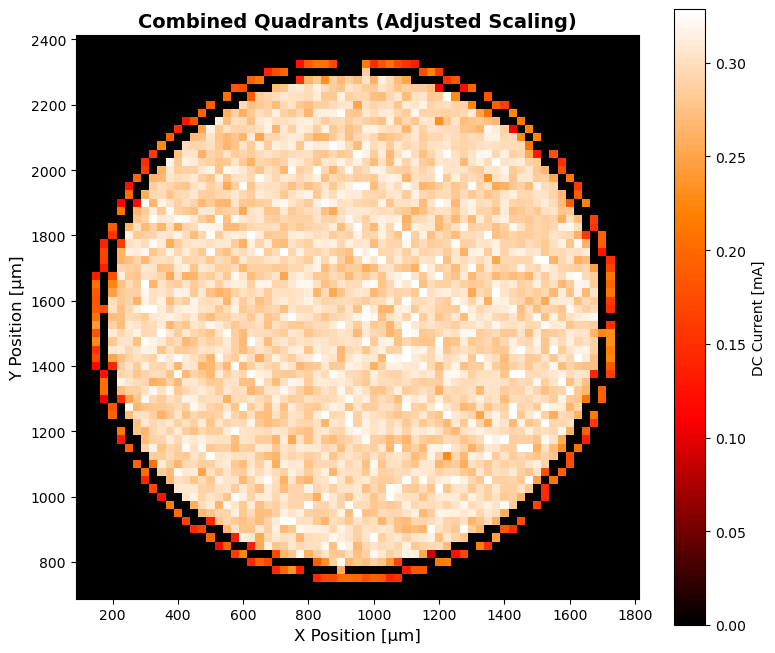

In [28]:
# Sum the current values from all quadrants
combined_current = dccurr_A + dccurr_B + dccurr_C + dccurr_D

# Set colormap limits using percentiles (avoiding extreme outliers)
vmin = 0
vmax = np.percentile(combined_current, 99)  # 99th percentile to enhance contrast

# Create the improved colormap
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.pcolormesh(x_positions, y_positions, combined_current, shading='nearest', cmap=cm, vmin=vmin, vmax=vmax)

ax.set_title("Combined Quadrants (Adjusted Scaling)", fontsize=14, fontweight='bold')
ax.set_xlabel("X Position [µm]", fontsize=12)
ax.set_ylabel("Y Position [µm]", fontsize=12)
ax.set_aspect('equal')

plt.colorbar(c, ax=ax, shrink=0.8, label="DC Current [mA]")

plt.tight_layout()
plt.show()

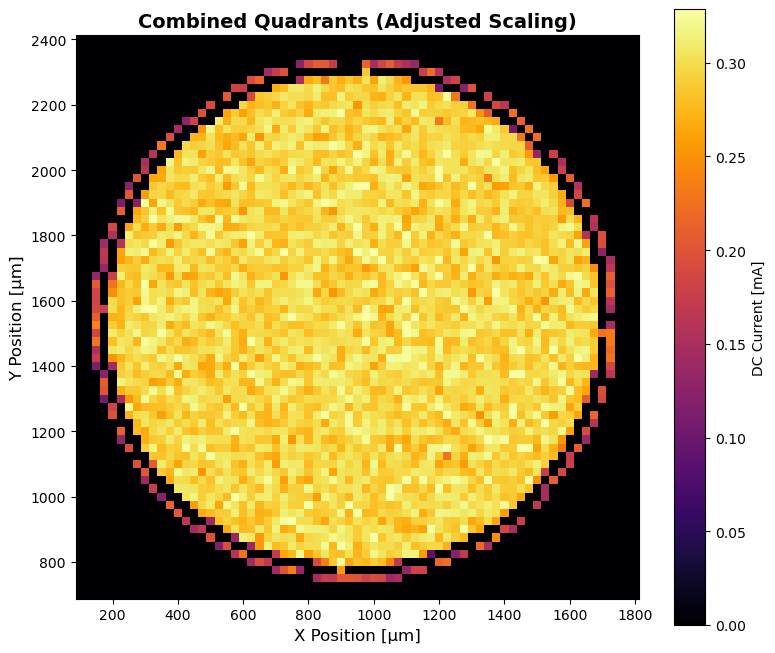

In [19]:
# Sum the current values from all quadrants
combined_current = dccurr_A + dccurr_B + dccurr_C + dccurr_D

# Set colormap limits using percentiles (avoiding extreme outliers)
vmin = 0
vmax = np.percentile(combined_current, 99)  # 99th percentile to enhance contrast

# Create the improved colormap
fig, ax = plt.subplots(figsize=(8, 8))
c = ax.pcolormesh(x_positions, y_positions, combined_current, shading='nearest', cmap='inferno', vmin=vmin, vmax=vmax)

ax.set_title("Combined Quadrants (Adjusted Scaling)", fontsize=14, fontweight='bold')
ax.set_xlabel("X Position [µm]", fontsize=12)
ax.set_ylabel("Y Position [µm]", fontsize=12)
ax.set_aspect('equal')

plt.colorbar(c, ax=ax, shrink=0.8, label="DC Current [mA]")

plt.tight_layout()
plt.show()

### Slicing

Available Y values: [ 700.  725.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000. 1025. 1050. 1075. 1100. 1125. 1150. 1175. 1200. 1225. 1250. 1275.
 1300. 1325. 1350. 1375. 1400. 1425. 1450. 1475. 1500. 1525. 1550. 1575.
 1600. 1625. 1650. 1675. 1700. 1725. 1750. 1775. 1800. 1825. 1850. 1875.
 1900. 1925. 1950. 1975. 2000. 2025. 2050. 2075. 2100. 2125. 2150. 2175.
 2200. 2225. 2250. 2275. 2300. 2325. 2350. 2375. 2400.]
Using closest Y = 1400.0


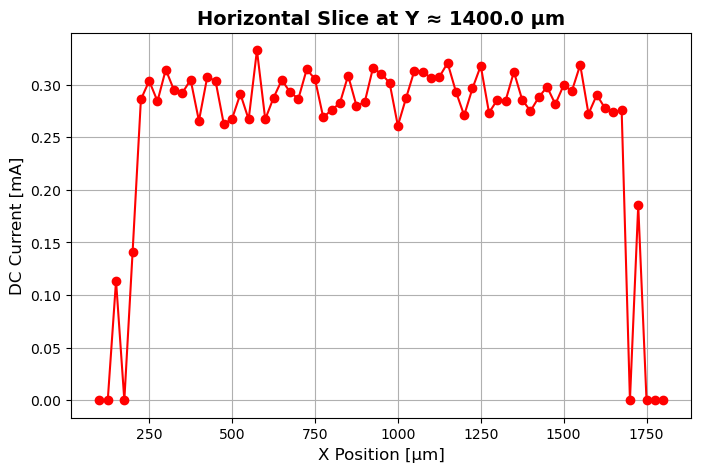

In [30]:
# Print available Y-values
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)

# Set Y value closest to desired target
y_target =  1400 # Adjust as needed
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3  # Half-step tolerance

# Find closest Y-value instead of assuming exact match
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Using closest Y = {y_closest}")

# Flatten position arrays for proper indexing
x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()

# Find indices where y ≈ y_closest
matching_indices = np.where(np.abs(y_positions_1D - y_closest) < tolerance)[0]

if matching_indices.size == 0:
    raise ValueError(f"No data found near y = {y_target}. Closest available: {y_closest}")

# Extract corresponding x-values and summed current for the slice
x_slice = x_positions_1D[matching_indices]
combined_current = (dccurr_A + dccurr_B + dccurr_C + dccurr_D).flatten()
current_slice = combined_current[matching_indices]

# Sort values for proper plotting
sorted_indices = np.argsort(x_slice)
x_slice_sorted = x_slice[sorted_indices]
current_slice_sorted = current_slice[sorted_indices]

# Plot the slice
plt.figure(figsize=(8, 5))
plt.plot(x_slice_sorted, current_slice_sorted, marker='o', linestyle='-', color='red')

plt.xlabel("X Position [µm]", fontsize=12)
plt.ylabel("DC Current [mA]", fontsize=12)
plt.title(f"Horizontal Slice at Y ≈ {y_closest} µm", fontsize=14, fontweight='bold')

plt.grid()
plt.show()

